In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

ModuleNotFoundError: No module named 'tensorflow'

## Datasets

In [114]:
import subprocess as sp
data_dir = sp.getoutput('src/data-dir.sh')
data_dir

'datasets'

### grassknoted/asl-alphabet
#### Using Python/Pandas

In [42]:
from tqdm.autonotebook import tqdm
tqdm.pandas()

ModuleNotFoundError: No module named 'tqdm'

In [36]:
paths = Path(data_dir).rglob('*.jp*')
next(paths)

PosixPath('datasets/asl_dataset/p/hand2_p_bot_seg_5_cropped.jpeg')

In [43]:
from pathlib import Path

paths = Path(data_dir).rglob('*.jp*')
df = pd.DataFrame({ 'filepath': paths })
df

,filepath
0,datasets/asl_dataset/p/hand2_p_bot_seg_5_cropp...
1,datasets/asl_dataset/p/hand3_p_dif_seg_5_cropp...
2,datasets/asl_dataset/p/hand1_p_left_seg_3_crop...
3,datasets/asl_dataset/p/hand2_p_dif_seg_1_cropp...
4,datasets/asl_dataset/p/hand2_p_dif_seg_2_cropp...
...,...
203053,datasets/asl_alphabet_test/asl_alphabet_test/D...
203054,datasets/asl_alphabet_test/asl_alphabet_test/T...
203055,datasets/asl_alphabet_test/asl_alphabet_test/I...
203056,datasets/asl_alphabet_test/asl_alphabet_test/R...


In [47]:
df.to_csv(f'{data_dir}/index.csv', index=False)

In [121]:
df = pd.read_csv(f'{data_dir}/index.csv')
to_exclude = df['filepath'].str.contains('asl_alphabet_test') | \
             df['filepath'].str.contains('Pre-Processed')
df = df[~to_exclude].reset_index(drop=True)
df

,filepath
0,datasets/asl_dataset/p/hand2_p_bot_seg_5_cropp...
1,datasets/asl_dataset/p/hand3_p_dif_seg_5_cropp...
2,datasets/asl_dataset/p/hand1_p_left_seg_3_crop...
3,datasets/asl_dataset/p/hand2_p_dif_seg_1_cropp...
4,datasets/asl_dataset/p/hand2_p_dif_seg_2_cropp...
...,...
147525,datasets/asl_alphabet_train/asl_alphabet_train...
147526,datasets/asl_alphabet_train/asl_alphabet_train...
147527,datasets/asl_alphabet_train/asl_alphabet_train...
147528,datasets/asl_alphabet_train/asl_alphabet_train...


Extract class and image index from filename.

In [126]:
df['filename'] = df['filepath'].map(os.path.basename)
df['filename']

0          hand2_p_bot_seg_5_cropped.jpeg
1          hand3_p_dif_seg_5_cropped.jpeg
2         hand1_p_left_seg_3_cropped.jpeg
3          hand2_p_dif_seg_1_cropped.jpeg
4          hand2_p_dif_seg_2_cropped.jpeg
                       ...               
147525                           P706.jpg
147526                          P2422.jpg
147527                            P42.jpg
147528                          P1490.jpg
147529                          P1655.jpg
Name: filename, Length: 147530, dtype: object

In [142]:
df['class'] = df['filepath'].str.split('/').str[-2]
df['class']

0         p
1         p
2         p
3         p
4         p
         ..
147525    P
147526    P
147527    P
147528    P
147529    P
Name: class, Length: 120630, dtype: object

In [143]:
df = df[df['class'].str.match(r'^[a-zA-Z]$')] # keep alphabet only
df['class'] = df['class'].str.upper()
df

,filepath,class,filename
0,datasets/asl_dataset/p/hand2_p_bot_seg_5_cropp...,P,hand2_p_bot_seg_5_cropped.jpeg
1,datasets/asl_dataset/p/hand3_p_dif_seg_5_cropp...,P,hand3_p_dif_seg_5_cropped.jpeg
2,datasets/asl_dataset/p/hand1_p_left_seg_3_crop...,P,hand1_p_left_seg_3_cropped.jpeg
3,datasets/asl_dataset/p/hand2_p_dif_seg_1_cropp...,P,hand2_p_dif_seg_1_cropped.jpeg
4,datasets/asl_dataset/p/hand2_p_dif_seg_2_cropp...,P,hand2_p_dif_seg_2_cropped.jpeg
...,...,...,...
147525,datasets/asl_alphabet_train/asl_alphabet_train...,P,P706.jpg
147526,datasets/asl_alphabet_train/asl_alphabet_train...,P,P2422.jpg
147527,datasets/asl_alphabet_train/asl_alphabet_train...,P,P42.jpg
147528,datasets/asl_alphabet_train/asl_alphabet_train...,P,P1490.jpg


In [145]:
df['class'].sort_values().unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

In [153]:
df.to_csv(f'{data_dir}/data.csv', index=False)

Find distribution of classes

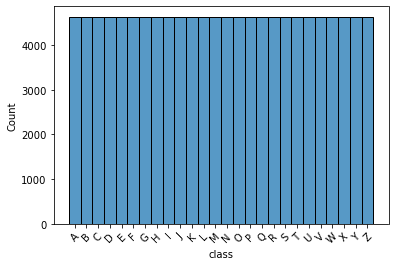

In [146]:
plt.xticks(rotation=45)
sns.histplot(data=df.sort_values('class'), x='class')

Display some example images.

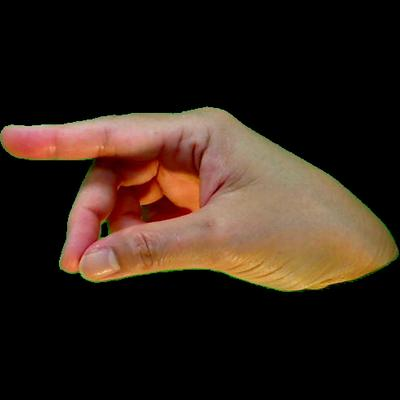

In [147]:
from IPython.display import Image
Image(filename=df['filepath'].values[0])

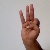

In [150]:
Image(filename=df['filepath'].values[10000])

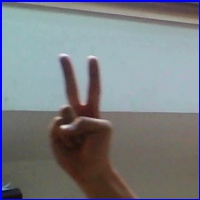

In [151]:
Image(filename=df['filepath'].values[100000])

#### Keras/Tensorflow style
Import the dataset into Keras/Tensorflow.

In [154]:
data = pd.read_csv(f'{data_dir}/data.csv')
data

,filepath,class,filename
0,datasets/asl_dataset/p/hand2_p_bot_seg_5_cropp...,P,hand2_p_bot_seg_5_cropped.jpeg
1,datasets/asl_dataset/p/hand3_p_dif_seg_5_cropp...,P,hand3_p_dif_seg_5_cropped.jpeg
2,datasets/asl_dataset/p/hand1_p_left_seg_3_crop...,P,hand1_p_left_seg_3_cropped.jpeg
3,datasets/asl_dataset/p/hand2_p_dif_seg_1_cropp...,P,hand2_p_dif_seg_1_cropped.jpeg
4,datasets/asl_dataset/p/hand2_p_dif_seg_2_cropp...,P,hand2_p_dif_seg_2_cropped.jpeg
...,...,...,...
120625,datasets/asl_alphabet_train/asl_alphabet_train...,P,P706.jpg
120626,datasets/asl_alphabet_train/asl_alphabet_train...,P,P2422.jpg
120627,datasets/asl_alphabet_train/asl_alphabet_train...,P,P42.jpg
120628,datasets/asl_alphabet_train/asl_alphabet_train...,P,P1490.jpg


In [152]:
tf.keras.preprocessing

NameError: name 'tf' is not defined

In [102]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'asl_alphabet_train/asl_alphabet_train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)
train_ds

Found 87000 files belonging to 29 classes.


<BatchDataset shapes: ((None, 224, 224, 3), (None, 29)), types: (tf.float32, tf.float32)>

In [151]:
class_names = np.array(train_ds.class_names)
class_names

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
       'del', 'nothing', 'space'], dtype='<U7')

Text(0.5, 1.0, "['P']")

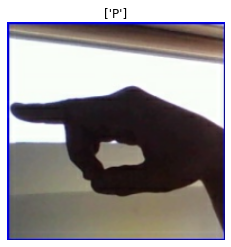

In [182]:
first_batch = iter(train_ds.take(1))
first_sample = next(first_batch)
images, labels = first_sample

i = 0
label, = np.where(labels[i])
image = images[i]
plt.imshow(image.numpy().astype("uint8"))
plt.axis("off")
plt.title(class_names[label])

### All datasets

In [69]:
d1 = tf.keras.preprocessing.image_dataset_from_directory(
    f'{data_dir}/asl_alphabet_train/asl_alphabet_train',
    image_size=(224, 224),
    seed=343
)
d1

Found 87000 files belonging to 29 classes.


<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

In [109]:
np.array(d1.class_names)

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
       'del', 'nothing', 'space'], dtype='<U7')

In [92]:
def plot_batch(dataset, class_names=None):
    batches = list(dataset.take(1).as_numpy_iterator())
    images, labels = batches[0]
    images.shape, labels.shape
    figure = plt.figure(figsize=(10, 10))
    for i in range(len(labels)):
        plt.subplot(4, 8, i + 1,
            title=class_names[labels[i]] if class_names else '')
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].astype('uint8'), cmap=plt.cm.binary)

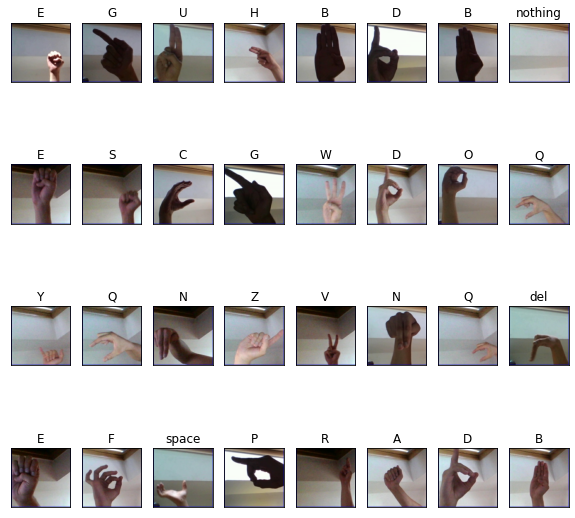

In [93]:
plot_batch(d1, d1.class_names)

In [22]:
d2 = tf.keras.preprocessing.image_dataset_from_directory(
    f'{data_dir}/asl_dataset/',
    image_size=(224, 224),
    seed=343
)
d2

Found 5030 files belonging to 37 classes.


<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

In [110]:
np.array(d2.class_names)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a',
       'asl_dataset', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k',
       'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x',
       'y', 'z'], dtype='<U11')

In [116]:
for elem in d2.as_numpy_iterator():
    ims, labels = elem
    print(labels)
    break

[15 11 30 27 19 14 32 14 11 28  9 28 19 31  5 11 11 36 11 11 30  5 11 22
 29 35  1 11 11  1 11  0]


In [118]:
d2.filter(lambda ims, labels: labels['label'] ==1)

TypeError: in user code:

    <ipython-input-118-2184dd755ce3>:1 None  *
        lambda ims, labels: labels['label'] ==1
    /Users/dunnkers/Library/Python/3.8/lib/python/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Users/dunnkers/Library/Python/3.8/lib/python/site-packages/tensorflow/python/ops/array_ops.py:1009 _slice_helper
        _check_index(s)
    /Users/dunnkers/Library/Python/3.8/lib/python/site-packages/tensorflow/python/ops/array_ops.py:886 _check_index
        raise TypeError(_SLICE_TYPE_ERROR + ", got {!r}".format(idx))

    TypeError: Only integers, slices (`:`), ellipsis (`...`), tf.newaxis (`None`) and scalar tf.int32/tf.int64 tensors are valid indices, got 'label'


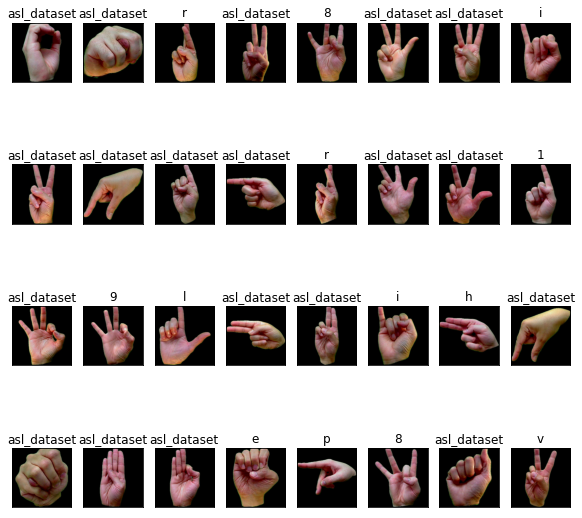

In [94]:
plot_batch(d2, d2.class_names)

In [17]:
d3 = tf.keras.preprocessing.image_dataset_from_directory(
    f'{data_dir}/Gesture Image Data',
    image_size=(224, 224),
    seed=343
)
d3

Found 55500 files belonging to 37 classes.


<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

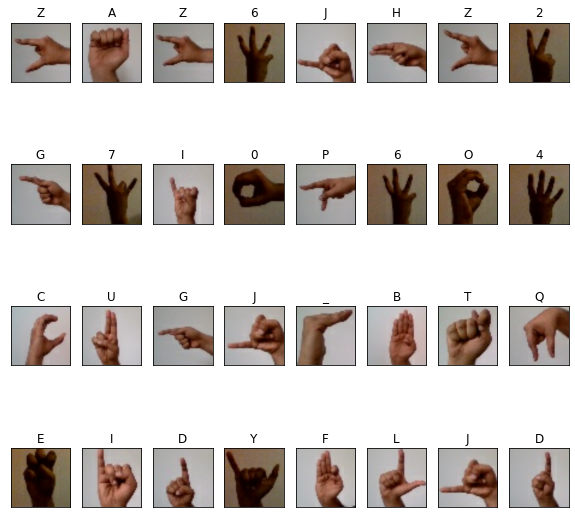

In [95]:
plot_batch(d3, d3.class_names)

In [99]:
dmerged = d1.concatenate(d2.concatenate(d3))
dmerged

<ConcatenateDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

In [106]:
dataset = tf.data.experimental.sample_from_datasets([d1, d2, d3])
dataset

<_DirectedInterleaveDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

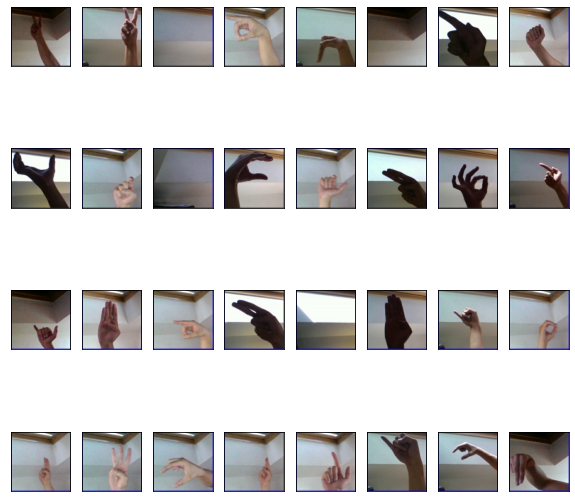

In [108]:
plot_batch(dataset)